# Plot tidal magnetic fields for different constituents

This notebook calculates magnetic fields due to different tidal constituents based on their spherical harmonic expansion coefficients. The data is taked from this publication:

Grayver, A. V., & Olsen, N. (2019). The Magnetic Signatures of the M2, N2, and O1 Oceanic Tides Observed in Swarm and CHAMP Satellite Magnetic Data. Geophysical Research Letters, 46(8), 4230-4238.

https://doi.org/10.1029/2019GL082400

If you use any of this data, please cite the mentioned paper.

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import chaosmagpy as cm

%matplotlib inline

Put some global definitions to be used for all constituents

In [132]:
dtheta = 1.
dphi = 1.
theta = np.linspace(dtheta / 2., 180. - dtheta / 2., num = 180. / dtheta)
phi = np.linspace(-180 + dphi / 2., 180. - dphi / 2., num = 360. / dphi)
radius = 6371.2 + 430.

/home/agrayver/anaconda3/envs/geomag/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agrayver/anaconda3/envs/geomag/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [133]:
def read_coefficients(file_name):
    lines = list()
    for line in open(file_name, "r"):
        if not line.strip().startswith("#"):
            lines.append(line.strip())
        
    nmax = int(lines[0].split()[0])
    period = float(lines[0].split()[1])
    lines = lines[1:]

    coeffs = np.zeros(shape=(nmax*(nmax+2), 2))
    idx = 0
    for line in lines:
        coeffs[idx,0] = float(line.split()[2])
        coeffs[idx,1] = float(line.split()[3])
        idx = idx + 1
        
    return coeffs,nmax,period

### Plot fields due to principal lunar semidiurnal (M2) tide

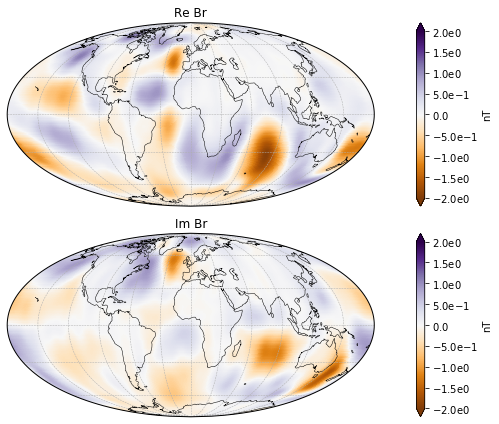

In [137]:
coeffs,nmax,period = read_coefficients("./data/M2.dat")
Br_re, _, _ = cm.model_utils.synth_values(coeffs[:,0], radius, theta, phi, nmax=nmax, grid=True)
Br_im, _, _ = cm.model_utils.synth_values(coeffs[:,1], radius, theta, phi, nmax=nmax, grid=True)

fig, ax = cm.plot_utils.plot_maps(theta, phi, Br_re, Br_im, layout=(2,1), label='nT', titles=('Re Br', 'Im Br'), figsize=(12,6), vmin = -2, vmax = 2)
plt.savefig('M2.png', dpi=96, bbox_inches="tight")

### Plot fields due to larger lunar elliptic semidiurnal (N2) tide

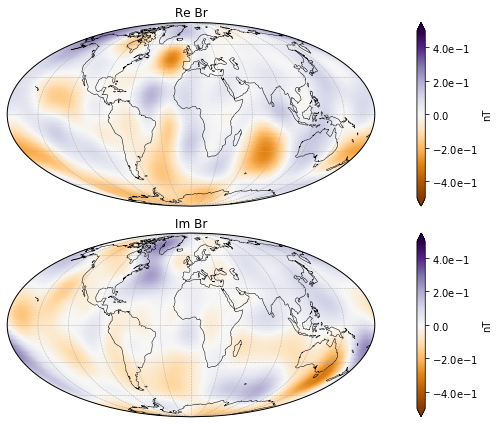

In [135]:
coeffs,nmax,period = read_coefficients("./data/N2.dat")
Br_re, _, _ = cm.model_utils.synth_values(coeffs[:,0], radius, theta, phi, nmax=nmax, grid=True)
Br_im, _, _ = cm.model_utils.synth_values(coeffs[:,1], radius, theta, phi, nmax=nmax, grid=True)

fig, ax = cm.plot_utils.plot_maps(theta, phi, Br_re, Br_im, layout=(2,1), label='nT', titles=('Re Br', 'Im Br'), figsize=(12,6), vmin = -0.5, vmax = 0.5)
plt.savefig('N2.png', dpi=96, bbox_inches="tight")

### Plot fields due to principal lunar diurnal (O1) tide

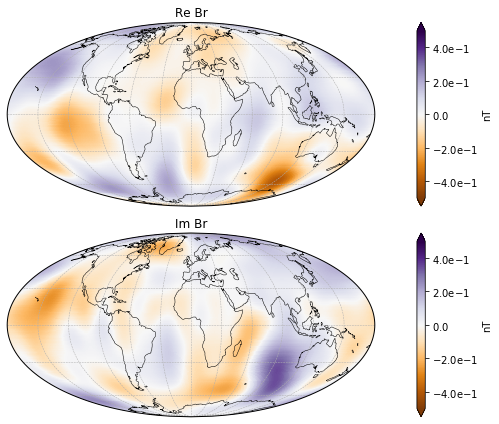

In [136]:
coeffs,nmax,period = read_coefficients("./data/O1.dat")
Br_re, _, _ = cm.model_utils.synth_values(coeffs[:,0], radius, theta, phi, nmax=nmax, grid=True)
Br_im, _, _ = cm.model_utils.synth_values(coeffs[:,1], radius, theta, phi, nmax=nmax, grid=True)

fig, ax = cm.plot_utils.plot_maps(theta, phi, Br_re, Br_im, layout=(2,1), label='nT', titles=('Re Br', 'Im Br'), figsize=(12,6), vmin = -0.5, vmax = 0.5)
plt.savefig('O1.png', dpi=96, bbox_inches="tight")